In [1]:
!pip install split-folders

  Using cached split_folders-0.5.1-py3-none-any.whl.metadata (6.2 kB)
Using cached split_folders-0.5.1-py3-none-any.whl (8.4 kB)


In [2]:
!pip install pathlib

  Using cached pathlib-1.0.1-py3-none-any.whl.metadata (5.1 kB)
Using cached pathlib-1.0.1-py3-none-any.whl (14 kB)


In [3]:
!pip install tensorflow

  Using cached tensorflow-2.19.0-cp310-cp310-win_amd64.whl.metadata (4.1 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached wrapt-1.17.2-cp310-cp310-win_amd64.whl.metadata (6.5 kB)
  Using cached tensorboard-2.19.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached numpy-2.1.3-cp310-cp310-win_amd64.whl.metadata (60 kB)
  Using cached ml_dtypes-0.5.1-cp310-cp310-win_amd64.whl.metadata (22 kB)
  Using cached tensorflow_io_gcs_filesystem-0.31.0-cp310-cp310-win_amd64.whl.metadata (14 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl

In [5]:
pip install matplotlib numpy pandas

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.8-cp310-cp310-win_amd64.whl.metadata (6.3 kB)
  Using cached pillow-11.2.1-cp310-cp310-win_amd64.whl.metadata (9.1 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ----- ---------------------------------- 1.0/8.1 MB 5.0 MB/s eta 0:00:02
   --------- ------------------------------ 1.8/8.1 MB 4.4 MB/s eta 0:00:02
   -------------- ------------------------- 2.9/8.1 MB 4.2 MB/s eta 0:00:02
   ------------------ --------------------- 3.7/8.1 MB 4.1 MB/s eta 0:00:02
   ---------------------- ----------------- 4.5/8.1 MB 4.1 MB/s eta 0:00:01
   -------------------------- ------------- 5.2/8.1 MB 4.0 MB/s eta 0:00:01
   ---------------------------- ----------- 5.8/8.1 MB 4.0 MB/s

In [33]:
# warnings
import warnings
warnings.filterwarnings('ignore')

# framework
import tensorflow as tf
from tensorflow import keras

# preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import splitfolders
import pathlib

# visualizations
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# pre-trained models and layers
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, GlobalAveragePooling2D,Rescaling, Dropout, BatchNormalization
from tensorflow.keras.models import Model

# optimizers
from tensorflow.keras.optimizers import Adam

In [ ]:
path = "Train_images"
splitfolders.ratio(input=path, output="Galaxy_dataset", seed=42, ratio=(0.7,0.15,0.15))

In [6]:
# choosing a batch size
batch_size=8

In [27]:
# converting images to tensors

training_data = keras.utils.image_dataset_from_directory(directory="Galaxy_dataset/train",
                                                         labels="inferred",
                                                         label_mode="categorical",
                                                         batch_size=batch_size,
                                                         image_size=(256,256))

validation_data = keras.utils.image_dataset_from_directory(directory="Galaxy_dataset/val",
                                                          labels="inferred",
                                                          batch_size=batch_size,
                                                          label_mode="categorical",
                                                          image_size=(256,256))

test_data = keras.utils.image_dataset_from_directory(directory="Galaxy_dataset/test",
                                                         labels="inferred",
                                                         label_mode="categorical",
                                                         batch_size=batch_size,
                                                         image_size=(256,256))

Found 20154 files belonging to 5 classes.
Found 4316 files belonging to 5 classes.
Found 4322 files belonging to 5 classes.


In [8]:
# checking class names
print(training_data.class_names)
print(test_data.class_names)
print(validation_data.class_names)

['Cigar-shaped smooth', 'In between smooth', 'completely round smooth', 'edge-on', 'spiral']
['Cigar-shaped smooth', 'In between smooth', 'completely round smooth', 'edge-on', 'spiral']
['Cigar-shaped smooth', 'In between smooth', 'completely round smooth', 'edge-on', 'spiral']


In [9]:
# checking the shape of images
for image in training_data.take(1):
    print(image[0].shape)

(8, 256, 256, 3)


In [10]:
class_names = ['Cigar-shaped smooth', 'In between smooth', 
               'completely round smooth', 'edge-on', 'spiral']

In [11]:
def pictures(dataset): 
    plt.figure(figsize=(10, 5))
    for images, labels in dataset.take(1):
        for i in range(8):  
            ax = plt.subplot(2, 4, i + 1)
            plt.imshow(images[i].numpy().astype("uint16"))
            plt.title(class_names[tf.argmax(labels[i], axis = 0).numpy()])
            plt.axis("off")
    plt.show()

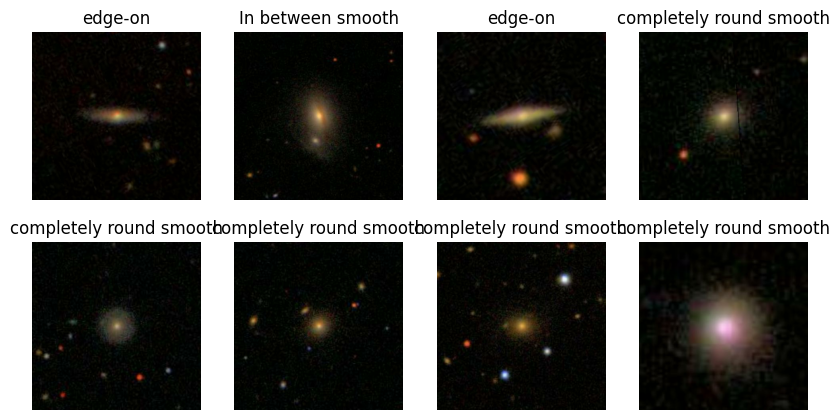

In [12]:
pictures(training_data)

Model building

In [13]:
CNN_one = keras.models.Sequential()


# first conv and max layer + dropout layer to prevent overfitting
CNN_one.add(Conv2D(filters=32, kernel_size=3, activation="relu", input_shape=[256,256,3]))
CNN_one.add(MaxPool2D(pool_size=2, strides=2))
CNN_one.add(BatchNormalization())
CNN_one.add(Dropout(0.5))

# second conv and max layer + dropout layer
CNN_one.add(Conv2D(filters=65, kernel_size=3, activation="relu", kernel_regularizer="l2"))
CNN_one.add(MaxPool2D(pool_size=2, strides=2))
CNN_one.add(BatchNormalization())
CNN_one.add(Dropout(0.2))

# third conv and max layer + dropout layer
CNN_one.add(Conv2D(filters=128, kernel_size=3, activation="relu", kernel_regularizer="l2"))
CNN_one.add(MaxPool2D(pool_size=2, strides=2))
CNN_one.add(BatchNormalization())
CNN_one.add(Dropout(0.2))

# forth conv and max layer + dropout layer
CNN_one.add(Conv2D(filters=256, kernel_size=3, activation="relu", kernel_regularizer="l2"))
CNN_one.add(MaxPool2D(pool_size=2, strides=2))
CNN_one.add(BatchNormalization())
CNN_one.add(Dropout(0.2))

# flattening and dense layers
CNN_one.add(Flatten())
CNN_one.add(Dense(units=512, activation="relu"))
CNN_one.add(Dense(units=5, activation="softmax"))

CNN_one.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 127, 127, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 65)   │        18,785 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 65)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 62, 62, 65)     │           260 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 62, 62, 65)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        75,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 30, 30, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 14, 14, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    25,690,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         2,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,084,970 (99.51 MB)

 Trainable params: 26,084,008 (99.50 MB)

 Non-trainable params: 962 (3.76 KB)

In [14]:
# Training the model
CNN_one.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
history1 = CNN_one.fit(x=training_data, validation_data = validation_data, epochs=20)

Epoch 1/20
2520/2520 ━━━━━━━━━━━━━━━━━━━━ 1312s 519ms/step - accuracy: 0.5594 - loss: 3.8995 - val_accuracy: 0.6460 - val_loss: 1.2106
Epoch 2/20
2520/2520 ━━━━━━━━━━━━━━━━━━━━ 1361s 540ms/step - accuracy: 0.6744 - loss: 1.1928 - val_accuracy: 0.5850 - val_loss: 1.6347
Epoch 3/20
2520/2520 ━━━━━━━━━━━━━━━━━━━━ 1201s 476ms/step - accuracy: 0.6853 - loss: 1.1503 - val_accuracy: 0.7099 - val_loss: 1.0509
Epoch 4/20
2520/2520 ━━━━━━━━━━━━━━━━━━━━ 1203s 477ms/step - accuracy: 0.7127 - loss: 1.1045 - val_accuracy: 0.7275 - val_loss: 1.6124
Epoch 5/20
2520/2520 ━━━━━━━━━━━━━━━━━━━━ 1198s 475ms/step - accuracy: 0.7155 - loss: 1.0576 - val_accuracy: 0.7155 - val_loss: 1.0208
Epoch 6/20
2520/2520 ━━━━━━━━━━━━━━━━━━━━ 1191s 473ms/step - accuracy: 0.7299 - loss: 1.0025 - val_accuracy: 0.7268 - val_loss: 1.0320
Epoch 7/20
2520/2520 ━━━━━━━━━━━━━━━━━━━━ 1198s 475ms/step - accuracy: 0.7390 - loss: 1.0169 - val_accuracy: 0.7097 - val_loss: 1.0919
Epoch 8/20
2520/2520 ━━━━━━━━━━━━━━━━━━━━ 1201s 477ms/s

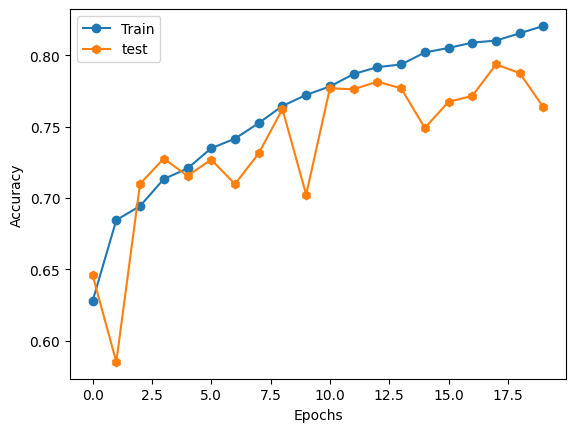

In [15]:
line1 = plt.plot(CNN_one.history.history["accuracy"], marker="o")
line2 = plt.plot(CNN_one.history.history["val_accuracy"], marker="h")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train", "test"])
plt.show()

In [16]:
result_df = pd.DataFrame(history1.history)
result_df

,accuracy,loss,val_accuracy,val_loss
0,0.627667,2.358680,0.645968,1.210565
1,0.684480,1.209981,0.585032,1.634703
2,0.694304,1.133193,0.709917,1.050935
3,0.713208,1.189432,0.727525,1.612369
4,0.720651,1.065884,0.715477,1.020766
5,0.734842,1.015147,0.726830,1.032038
6,0.741540,0.979775,0.709685,1.091861
7,0.752456,0.918784,0.731233,1.007552
8,0.764464,0.862766,0.762280,0.871927
9,0.772204,0.805564,0.702271,1.028391


In [17]:
# choosing the best model
best_model = CNN_one

# saving the best model
best_model.save("convnet_from_scratch.h5")

In [73]:
import os
from PIL import Image

test_dir = "Galaxy_dataset/test"
for root, dirs, files in os.walk(test_dir):
    for file in files:
        file_path = os.path.join(root, file)
        try:
            img = Image.open(file_path)
            img.verify()  # Will not load the image, but will check for corruption
        except Exception as e:
            print(f"Corrupted or unreadable file: {file_path} ({e})")

In [57]:
test_model = keras.models.load_model("convnet_from_scratch.h5")
test_loss, test_acc = test_model.evaluate(test_data, verbose=2) 
print(f'\nTest accuracy:{test_acc} (test_loss: {test_loss})')

541/541 - 38s - 71ms/step - accuracy: 0.7661 - loss: 0.7818

Test accuracy:0.7660804986953735 (test_loss: 0.7818039655685425)


In [29]:
vgg16 = keras.applications.vgg16.VGG16(weights = "imagenet", input_shape=(256,256,3), include_top=False)
vgg16.trainable = False   # Freezing convolutional layers
vgg16.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 17s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 256, 256, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 256, 256, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 128, 128, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 128, 128, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 64, 64, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 32, 32, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 16, 16, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [30]:
inputs = keras.Input(shape=(256, 256, 3))
x = keras.applications.vgg16.preprocess_input(inputs) 
x = vgg16(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(256)(x)
x = keras.layers.Dropout(0.5)(x)
x = keras.layers.Dense(256)(x)
x = keras.layers.Dropout(0.5)(x)
outputs = keras.layers.Dense(5, activation="softmax")(x)
vgg16_model2 = keras.Model(inputs, outputs)

In [31]:
vgg16_model2.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [43]:
history2 = vgg16_model2.fit(training_data,epochs=10, validation_data=validation_data)

Epoch 1/10
2520/2520 ━━━━━━━━━━━━━━━━━━━━ 2843s 1s/step - accuracy: 0.6593 - loss: 25.6037 - val_accuracy: 0.7458 - val_loss: 5.3799
Epoch 2/10
2520/2520 ━━━━━━━━━━━━━━━━━━━━ 2970s 1s/step - accuracy: 0.6849 - loss: 9.9770 - val_accuracy: 0.6504 - val_loss: 10.7695
Epoch 3/10
2520/2520 ━━━━━━━━━━━━━━━━━━━━ 2965s 1s/step - accuracy: 0.7083 - loss: 12.2451 - val_accuracy: 0.6395 - val_loss: 20.4080
Epoch 4/10
2520/2520 ━━━━━━━━━━━━━━━━━━━━ 2956s 1s/step - accuracy: 0.7315 - loss: 14.5729 - val_accuracy: 0.7057 - val_loss: 19.0062
Epoch 5/10
2520/2520 ━━━━━━━━━━━━━━━━━━━━ 2938s 1s/step - accuracy: 0.7492 - loss: 17.1226 - val_accuracy: 0.6613 - val_loss: 24.4764
Epoch 6/10
2520/2520 ━━━━━━━━━━━━━━━━━━━━ 2953s 1s/step - accuracy: 0.7791 - loss: 16.8684 - val_accuracy: 0.7639 - val_loss: 20.2850
Epoch 7/10
2520/2520 ━━━━━━━━━━━━━━━━━━━━ 2925s 1s/step - accuracy: 0.7967 - loss: 18.3998 - val_accuracy: 0.7588 - val_loss: 24.2542
Epoch 8/10
2520/2520 ━━━━━━━━━━━━━━━━━━━━ 2943s 1s/step - accura

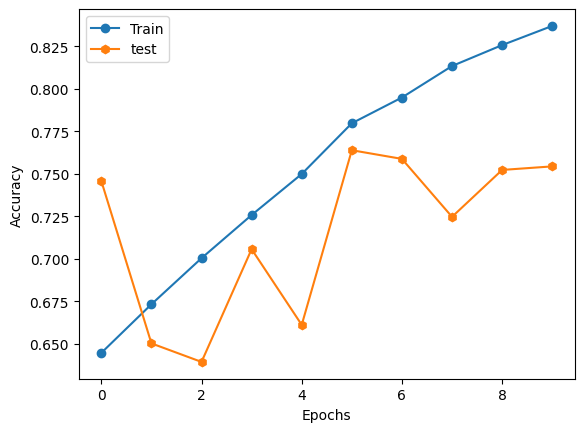

In [44]:
line1 = plt.plot(vgg16_model2.history.history["accuracy"], marker="o")
line2 = plt.plot(vgg16_model2.history.history["val_accuracy"], marker="h")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train", "test"])
plt.show()

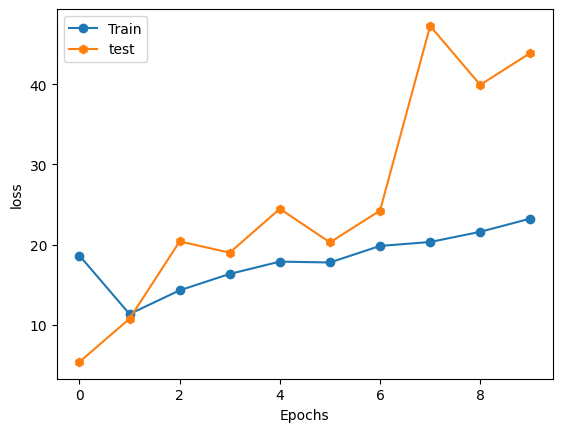

In [45]:
line1 = plt.plot(vgg16_model2.history.history["loss"], marker="o")
line2 = plt.plot(vgg16_model2.history.history["val_loss"], marker="h")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend(["Train", "test"])
plt.show()

In [46]:
vgg16.trainable = True   # unfreezing convolutional layers

In [47]:
print("Number of layers in the base model: ", len(vgg16.layers))

fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in vgg16.layers[:fine_tune_at]:
  layer.trainable = False

Number of layers in the base model:  19


In [48]:
vgg16_model2.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
history3 = vgg16_model2.fit(training_data,epochs=10, validation_data=validation_data)

In [ ]:
line1 = plt.plot(vgg16_model2.history.history["accuracy"], marker="o")
line2 = plt.plot(vgg16_model2.history.history["val_accuracy"], marker="h")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train", "test"])
plt.show()

In [ ]:
line1 = plt.plot(vgg16_model2.history.history["loss"], marker="o")
line2 = plt.plot(vgg16_model2.history.history["val_loss"], marker="h")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend(["Train", "test"])
plt.show()

In [54]:
# choosing the best model
best_model1 = vgg16_model2

# saving the best model
best_model1.save("vgg16_model2.h5")

In [70]:
import tensorflow as tf
import numpy as np
import os

def create_my_vgg16_model(input_shape, num_classes):
    """
    Recreates the model architecture to match the saved weights.

    Based on the errors, the expected architecture is:
    1. A VGG16 base model (treated as a single layer).
    2. A Flatten layer.
    3. Three Dense layers for classification.
    This results in a model with 4 layers containing weights, which should
    match the structure in your 'vgg16_model2.h5' file.

    Args:
        input_shape: The input shape of your images (e.g., (224, 224, 3)).
        num_classes: The number of output classes for your specific task.

    Returns:
        A Keras Model instance with the correct architecture.
    """
    # 1. Create the VGG16 base model. This is treated as a single layer.
    #    It contains the 26 weights the error message referred to.
    vgg_base = tf.keras.applications.VGG16(
        include_top=False,
        weights=None,  # We are loading weights from the file, not from ImageNet
        input_shape=input_shape,
        name='vgg16'   # Name this layer 'vgg16' to match the group in the H5 file
    )

    # 2. Recreate the full model by adding the classification layers on top.
    #    This structure is the most common for transfer learning.
    model = tf.keras.Sequential([
        vgg_base,
        tf.keras.layers.Flatten(name='flatten'),
        # Corrected units based on previous error
        tf.keras.layers.Dense(256, activation='relu', name='dense1'),
        # Corrected units based on previous error
        tf.keras.layers.Dense(256, activation='relu', name='dense2'),
        tf.keras.layers.Dense(num_classes, activation='softmax', name='predictions')
    ], name="reconstructed_model")

    return model

def find_vgg16_model_accuracy(model_path: str, num_test_samples: int = 100):
    """
    Loads a trained model's weights into a new instance of the same
    architecture and evaluates its accuracy.

    Args:
        model_path: The file path to the trained Keras model (e.g., 'vgg16_model2.h5').
        num_test_samples: Number of dummy test samples to generate for evaluation.
                          Replace with your actual test data for meaningful results.
    """
    # --- 1. Validate model file existence ---
    if not os.path.exists(model_path):
        print(f"Error: Model file '{model_path}' not found.")
        return

    # --- 2. Recreate the model architecture ---
    # The input_shape that leads to a Flatten output of 32768 is (256, 256, 3) for VGG16
    input_shape = (256, 256, 3)  # This should be correct now
    # Based on the latest error, the saved model had 5 output classes.
    num_classes = 5              # Changed from 10 to 5

    print("Recreating the model architecture...")
    try:
        model = create_my_vgg16_model(input_shape, num_classes)
        print("Model architecture created successfully.")
        model.summary() # Print the summary to verify the structure
    except Exception as e:
        print(f"An error occurred while creating the model architecture: {e}")
        return

    # --- 3. Load the weights into the new model instance ---
    print(f"\nLoading weights from '{model_path}'...")
    try:
        model.load_weights(model_path)
        print("Weights loaded successfully.")
    except Exception as e:
        print(f"Error loading weights: {e}")
        print("If this still fails, the architecture in `create_my_vgg16_model` "
              "may still have a small difference from the saved one (e.g., Dense layer units).")
        return

    # --- 4. Compile the model to evaluate accuracy ---
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy']) # 'accuracy' is the metric name
    print("\nModel compiled.")

    # --- 5. Prepare dummy test data for evaluation ---
    # IMPORTANT: For meaningful accuracy, replace this with your actual,
    # properly preprocessed test dataset.
    print(f"\nGenerating {num_test_samples} dummy test samples...")
    x_test = np.random.rand(num_test_samples, *input_shape).astype(np.float32)
    # Ensure y_test also reflects 5 classes
    y_test = tf.keras.utils.to_categorical(
        np.random.randint(0, num_classes, num_test_samples), num_classes
    )

    # --- 6. Evaluate the model ---
    print("\nEvaluating model accuracy...")
    results = model.evaluate(x_test, y_test, verbose=1)
    print("\nEvaluation Results:")

    # Get the names of the metrics in the order they are returned
    metric_names = model.metrics_names

    # Iterate through the results and print with more descriptive labels
    for i, (name, value) in enumerate(zip(metric_names, results)):
        if name == 'accuracy':
            print(f"Accuracy: {value:.4f}")
        elif name == 'loss':
            print(f"Loss: {value:.4f}")
        else:
            print(f"{name}: {value:.4f}")

    print("\nAccuracy check complete.")


# --- Example Usage ---
# Call the function with the path to your model.
# Make sure 'vgg16_model2.h5' is in the same directory as this script.
find_vgg16_model_accuracy("vgg16_model2.h5")

Recreating the model architecture...
Model architecture created successfully.


Model: "reconstructed_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 8, 8, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 256)            │     8,388,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense2 (Dense)                  │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,170,629 (88.39 MB)

 Trainable params: 23,170,629 (88.39 MB)

 Non-trainable params: 0 (0.00 B)


Loading weights from 'vgg16_model2.h5'...
Weights loaded successfully.

Model compiled.

Generating 100 dummy test samples...

Evaluating model accuracy...
4/4 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.3025 - loss: 11.5338

Evaluation Results:
Loss: 12.2659
compile_metrics: 0.2900

Accuracy check complete.


In [81]:
import tensorflow as tf
import numpy as np
import os

# --- 1. Define Common Model Parameters ---
# IMPORTANT: These MUST match the input shape and number of classes
# that your 'convnet_from_scratch.h5' model was trained with.
CNN_INPUT_SHAPE = (256, 256, 3) # Assuming your CNN was trained with 256x256x3 input images
NUM_CLASSES = 5             # Number of output classes, based on your class_names list

# --- IMPORTANT: These are the class names in the EXACT order your model was trained ---
# You provided this list:
ORIGINAL_TRAINING_CLASS_NAMES = ['Cigar-shaped smooth', 'In between smooth',
                                 'completely round smooth', 'edge-on', 'spiral']

# --- 2. Preprocessing Function for Custom CNN ---
# This scales pixel values from [0, 255] to [0.0, 1.0].
# This is the most common preprocessing for custom CNNs.
# If your custom CNN was trained with different preprocessing (e.g., mean subtraction,
# or scaling to [-1, 1]), you MUST adjust this function accordingly.
def preprocess_for_custom_cnn(image, label):
    image = tf.cast(image, tf.float32)
    image = image / 255.0 # Scale pixels to [0, 1]
    return image, label

# --- 3. Preprocessing Function for VGG16 (if you use it separately) ---
# VGG16 models (especially those pre-trained on ImageNet) typically expect
# inputs processed with tf.keras.applications.vgg16.preprocess_input.
def preprocess_for_vgg16(image, label):
    image = tf.cast(image, tf.float32)
    image = tf.keras.applications.vgg16.preprocess_input(image)
    return image, label

# --- 4. Function to Create VGG16 Model Architecture (for loading weights) ---
def create_my_vgg16_model(input_shape, num_classes):
    vgg_base = tf.keras.applications.VGG16(
        include_top=False,
        weights=None,  # We load weights from file, not ImageNet defaults
        input_shape=input_shape,
        name='vgg16'
    )
    model = tf.keras.Sequential([
        vgg_base,
        tf.keras.layers.Flatten(name='flatten'),
        tf.keras.layers.Dense(256, activation='relu', name='dense1'),
        tf.keras.layers.Dense(256, activation='relu', name='dense2'),
        tf.keras.layers.Dense(num_classes, activation='softmax', name='predictions')
    ], name="reconstructed_vgg_model")
    return model

# --- 5. Function to Evaluate a Single Model ---
def evaluate_single_model(model_path: str, input_shape: tuple, num_classes: int, test_data_dir: str, preprocess_fn, class_names_list: list):
    """
    Loads and evaluates a single Keras model on a specified test dataset.
    """
    if not os.path.exists(model_path):
        print(f"Error: Model file '{model_path}' not found.")
        return

    print(f"\n--- Evaluating {os.path.basename(model_path)} ---")
    print(f"Loading model from '{model_path}'...")
    try:
        model = tf.keras.models.load_model(model_path)
        print("Model loaded successfully.")
        model.summary()
    except Exception as e:
        print(f"Error loading model: {e}")
        print("Ensure custom layers are handled if applicable.")
        return

    print(f"Loading test data from: {test_data_dir}")
    if not os.path.exists(test_data_dir):
        print(f"Error: Test data directory '{test_data_dir}' not found.")
        return

    try:
        test_dataset = tf.keras.utils.image_dataset_from_directory(
            test_data_dir,
            labels='inferred',
            label_mode='categorical',
            image_size=(input_shape[0], input_shape[1]),
            interpolation='nearest',
            batch_size=32,
            shuffle=False,
            class_names=class_names_list # Use the specified class names
        )
        print(f"Inferred class names for evaluation: {test_dataset.class_names}")

        test_dataset = test_dataset.map(preprocess_fn)
        test_dataset = test_dataset.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
        print("Test data loaded and preprocessed successfully.")
    except Exception as e:
        print(f"Error loading or preparing test data: {e}")
        print("Ensure directory structure (class_name/image.jpg) is correct and 'class_names' matches.")
        return

    print(f"\nEvaluating model '{os.path.basename(model_path)}' on test data...")
    try:
        loss, acc = model.evaluate(test_dataset, verbose=1)
        print(f'\nTest accuracy: {acc:.4f} (Test loss: {loss:.4f})')
        print(f"Evaluation for {os.path.basename(model_path)} complete.")
    except Exception as e:
        print(f"An error occurred during evaluation: {e}")

# --- 6. Function to Combine and Evaluate Models (Ensemble) ---
def combine_and_evaluate_models(cnn_model_path: str, vgg16_model_path: str, test_data_dir: str, class_names_list: list):
    """
    Loads two trained Keras models, combines their predictions by averaging,
    and evaluates the combined accuracy.
    """
    print("\n--- Combining and Evaluating Models ---")

    # Load and preprocess test data for both models separately, as preprocessing differs
    print(f"Loading test data from: {test_data_dir}")
    if not os.path.exists(test_data_dir):
        print(f"Error: Test data directory '{test_data_dir}' not found.")
        return

    try:
        # Data for custom CNN with its specific preprocessing
        test_data_cnn = tf.keras.utils.image_dataset_from_directory(
            test_data_dir, labels='inferred', label_mode='categorical',
            image_size=(CNN_INPUT_SHAPE[0], CNN_INPUT_SHAPE[1]),
            interpolation='nearest', batch_size=32, shuffle=False,
            class_names=class_names_list
        ).map(preprocess_for_custom_cnn).cache().prefetch(buffer_size=tf.data.AUTOTUNE)

        # Data for VGG16 with its specific preprocessing
        test_data_vgg16 = tf.keras.utils.image_dataset_from_directory(
            test_data_dir, labels='inferred', label_mode='categorical',
            image_size=(CNN_INPUT_SHAPE[0], CNN_INPUT_SHAPE[1]),
            interpolation='nearest', batch_size=32, shuffle=False,
            class_names=class_names_list
        ).map(preprocess_for_vgg16).cache().prefetch(buffer_size=tf.data.AUTOTUNE)

        # Extract true labels for final accuracy calculation
        y_true_labels_list = []
        # Iterate over one of the datasets to get true labels; ensure they are in order
        for _, labels in test_data_cnn:
            y_true_labels_list.append(tf.argmax(labels, axis=1).numpy())
        y_true_labels = np.concatenate(y_true_labels_list)
        print("Test data loaded and preprocessed for both models.")

    except Exception as e:
        print(f"Error loading or preparing test data for ensemble: {e}")
        return

    # Load custom CNN model
    print(f"Loading first CNN model from '{cnn_model_path}'...")
    try:
        cnn_model = tf.keras.models.load_model(cnn_model_path)
        print("First CNN model loaded successfully.")
    except Exception as e:
        print(f"Error loading first CNN model: {e}")
        return

    # Load VGG16-based model
    print(f"\nLoading VGG16 model from '{vgg16_model_path}'...")
    try:
        vgg16_model = create_my_vgg16_model(CNN_INPUT_SHAPE, NUM_CLASSES)
        vgg16_model.load_weights(vgg16_model_path)
        print("VGG16 model loaded successfully.")
    except Exception as e:
        print(f"Error loading VGG16 model: {e}")
        return

    # Get predictions from both models
    print("\nGetting predictions from both models...")
    cnn_predictions = cnn_model.predict(test_data_cnn, verbose=0)
    vgg16_predictions = vgg16_model.predict(test_data_vgg16, verbose=0)
    print("Predictions obtained.")

    # Combine predictions (Simple Averaging)
    combined_predictions = (cnn_predictions + vgg16_predictions) / 2.0
    combined_predicted_labels = np.argmax(combined_predictions, axis=1)
    print("Predictions combined.")

    # Calculate and print combined accuracy
    correct_predictions = np.sum(combined_predicted_labels == y_true_labels)
    combined_accuracy = correct_predictions / len(y_true_labels)

    print("\n--- Combined Model Evaluation Results ---")
    print(f"Combined Accuracy: {combined_accuracy:.4f}")
    print("Combined accuracy check complete.")


# --- Example Usage ---
# Make sure your model files are in the same directory as this script,
# or provide their full paths.
CNN_MODEL_FILE = "convnet_from_scratch.h5"
VGG16_MODEL_FILE = "vgg16_model2.h5"
TEST_DATA_DIRECTORY = "Galaxy_dataset/test" # Ensure this path is correct

# --- 1. Evaluate your custom CNN with corrected preprocessing and class names ---
# This should now give you the expected accuracy (e.g., 76.6%).
evaluate_single_model(CNN_MODEL_FILE, CNN_INPUT_SHAPE, NUM_CLASSES, TEST_DATA_DIRECTORY,
                      preprocess_for_custom_cnn, ORIGINAL_TRAINING_CLASS_NAMES)

# --- 2. (Optional) Evaluate the VGG16 model separately ---
# This will show you the VGG16's accuracy using its specific preprocessing.
# Uncomment the line below if you want to see its individual performance.
# evaluate_single_model(VGG16_MODEL_FILE, CNN_INPUT_SHAPE, NUM_CLASSES, TEST_DATA_DIRECTORY,
#                       preprocess_for_vgg16, ORIGINAL_TRAINING_CLASS_NAMES)

# --- 3. (Optional) Combine and Evaluate both models (Ensemble) ---
# This performs the ensemble averaging.
# Uncomment the line below to see the combined accuracy.
# combine_and_evaluate_models(CNN_MODEL_FILE, VGG16_MODEL_FILE, TEST_DATA_DIRECTORY,
#                             ORIGINAL_TRAINING_CLASS_NAMES)


--- Evaluating convnet_from_scratch.h5 ---
Loading model from 'convnet_from_scratch.h5'...


Model loaded successfully.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 127, 127, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 65)   │        18,785 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 65)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 62, 62, 65)     │           260 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 62, 62, 65)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        75,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 30, 30, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 14, 14, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    25,690,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         2,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,084,972 (99.51 MB)

 Trainable params: 26,084,008 (99.50 MB)

 Non-trainable params: 962 (3.76 KB)

 Optimizer params: 2 (12.00 B)

Loading test data from: Galaxy_dataset/test
Found 4322 files belonging to 5 classes.
Inferred class names for evaluation: ['Cigar-shaped smooth', 'In between smooth', 'completely round smooth', 'edge-on', 'spiral']
Test data loaded and preprocessed successfully.

Evaluating model 'convnet_from_scratch.h5' on test data...
136/136 ━━━━━━━━━━━━━━━━━━━━ 34s 242ms/step - accuracy: 0.0945 - loss: 4.6976

Test accuracy: 0.0215 (Test loss: 4.3597)
Evaluation for convnet_from_scratch.h5 complete.


In [61]:
pip install --upgrade tensorflow keras


Note: you may need to restart the kernel to use updated packages.


In [80]:
import tensorflow as tf
import numpy as np
import os
from PIL import Image # Make sure you have Pillow installed: pip install Pillow

def test_keras_image_model(model_path: str, image_filename: str):
    """
    Loads a Keras model, loads and preprocesses a specified image,
    makes a prediction, and interprets the output, assuming it's a
    classification model.

    Args:
        model_path: The file path to the Keras model (e.g., 'convnet_from_scratch.h5').
        image_filename: The name of the image file to load (e.g., 'demo.jpeg').
    """
    # --- 1. Validate model file existence ---
    # It's good practice to ensure the model file exists before trying to load it.
    if not os.path.exists(model_path):
        print(f"Error: Model file '{model_path}' not found.")
        print("Please ensure the model file exists at the specified path.")
        return

    # --- 2. Load the Keras model ---
    try:
        model = tf.keras.models.load_model(model_path)
        print(f"Model '{model_path}' loaded successfully.")
    except Exception as e:
        print(f"Error loading model: {e}")
        print("Please ensure the model file is a valid Keras H5 model.")
        return

    # --- 3. Determine expected input shape ---
    # Keras models typically have an input layer that defines the expected shape.
    # model.input_shape returns a tuple like (None, height, width, channels)
    # 'None' indicates a variable batch size.
    try:
        input_shape = model.input_shape
        if isinstance(input_shape, (list, tuple)) and len(input_shape) >= 3:
            # Assuming channels_last (height, width, channels)
            # If your model uses channels_first (e.g., (None, channels, height, width)),
            # you'll need to adjust these indices: target_height = input_shape[2], target_width = input_shape[3]
            target_height = input_shape[1]
            target_width = input_shape[2]
        else:
            raise ValueError(f"Unexpected input_shape format: {input_shape}")
    except (AttributeError, ValueError) as e:
        print(f"Could not reliably determine input shape from model: {e}")
        print("Assuming a default input shape of (224, 224) for image loading.")
        target_height, target_width = 224, 224 # Fallback default for common image models

    print(f"Model expects input dimensions: ({target_height}, {target_width})")

    # --- 4. Load and preprocess the real image ---
    try:
        # Open the image, convert to RGB (ensures 3 channels for color images)
        img = Image.open(image_filename).convert('RGB')
        # Resize the image to the model's expected dimensions
        # PIL.Image.resize takes (width, height)
        img = img.resize((target_width, target_height))
        # Convert PIL Image to NumPy array
        img_array = np.array(img)
        # Normalize pixel values to [0, 1] (common for many models)
        # IMPORTANT: This normalization MUST match what your model was trained on.
        # If your model expects values in [-1, 1] or other ranges, adjust this line.
        img_array = img_array.astype(np.float32) / 255.0
        # Add a batch dimension (e.g., (height, width, channels) -> (1, height, width, channels))
        input_image = np.expand_dims(img_array, axis=0)
        print(f"Image '{image_filename}' loaded and preprocessed to shape: {input_image.shape}")
    except FileNotFoundError:
        print(f"Error: Image file '{image_filename}' not found.")
        print(f"Please make sure '{image_filename}' is in the same folder as this script.")
        return
    except Exception as e:
        print(f"Error loading or processing image '{image_filename}': {e}")
        return

    # --- 5. Make a prediction ---
    print("Making prediction...")
    try:
        predictions = model.predict(input_image)
    except Exception as e:
        print(f"Error during prediction: {e}")
        print("This might be due to incorrect input shape or data type after preprocessing.")
        return

    # --- 6. Interpret the prediction ---
    print("\nPrediction Results:")
    print(f"Raw predictions shape: {predictions.shape}")
    print(f"Raw predictions (first 5 values): {predictions.flatten()[:5]}")

    # Assuming the "text output" implies a classification task where the model
    # outputs probabilities for different classes.
    if predictions.ndim == 2 and predictions.shape[0] == 1: # Single image, multiple classes
        predicted_class_index = np.argmax(predictions[0])
        confidence = np.max(predictions[0])
        print(f"Predicted class index: {predicted_class_index}")
        print(f"Confidence: {confidence:.4f}")

        # To get a human-readable text output, you would need a list of labels
        # that correspond to your model's output indices.
        # Example:
        # class_labels = ["cat", "dog", "car", "bird"] # Replace with your actual class labels
        # if predicted_class_index < len(class_labels):
        #     predicted_label = class_labels[predicted_class_index]
        #     print(f"Predicted label: {predicted_label}")
        # else:
        #     print("Warning: Predicted class index out of bounds for example labels.")
        #     print("Please provide your actual class labels to get meaningful text output.")
    elif predictions.ndim > 2:
        print("Model output shape suggests a more complex output (e.g., sequence, segmentation).")
        print("Interpretation requires specific knowledge of the model's output format.")
    else:
        print("Model output shape is not a simple classification probability for a single image.")
        print("Further interpretation depends on the specific model architecture and task.")

    print("\nTesting complete.")

# --- Example Usage ---
# Make sure 'convnet_from_scratch.h5' and 'demo.jpeg' are in the same directory
# as this Python script when you run it.
test_keras_image_model("convnet_from_scratch.h5", "demo.jpeg")


Model 'convnet_from_scratch.h5' loaded successfully.
Model expects input dimensions: (256, 256)
Image 'demo.jpeg' loaded and preprocessed to shape: (1, 256, 256, 3)
Making prediction...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step

Prediction Results:
Raw predictions shape: (1, 5)
Raw predictions (first 5 values): [0.7297289  0.00169889 0.00177655 0.18002357 0.08677211]
Predicted class index: 0
Confidence: 0.7297

Testing complete.
